<h1 style="text-align: center;">Lab1 Project</h1>
<h1 style="text-align: center;">Coronavirus Analysis</h1>

(This project study about covid, which is one of the most infectious viruses in history)


**Member lists**

| Full Name |MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :---:
|Lâm Thị Xuân Thy|20127082|Preprocessing continents dataset|100%
|Nguyễn Huy Hoàn|20127166|Preprocessing countries dataset|100%
|Bùi Thanh Lâm|20127402|Question 1: Which countries have had high newcases recently and find the reason.|100%
|Đào Ngọc Hoa|20127500|I. Data Colection, II. Read data and preprocessing|100%
|Võ Thanh Lâm|20127546|Question 2: What are the current trends of covid pandemic among continents?|100%

<a class="anchor" id="1"></a>
## I. Collecting data 

**copy paste file crawl.ipynb this section**

## II. Data Exploration <a class="anchor" id="2"></a>
(*This process is often interleaved with preprocessing*)

**Import libraries**

In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

**Read data**

In [2]:
csv_files = glob.glob("Date*.csv")
csv_files

['Date2023-02-25.csv',
 'Date2023-03-09.csv',
 'Date2023-03-10.csv',
 'Date2023-03-06.csv',
 'Date2023-02-24.csv',
 'Date2023-03-05.csv',
 'Date2023-02-28.csv',
 'Date2023-03-04.csv',
 'Date2023-02-27.csv',
 'Date2023-03-07.csv',
 'Date2023-03-08.csv',
 'Date2023-02-26.csv',
 'Date2023-03-02.csv',
 'Date2023-03-01.csv',
 'Date2023-03-03.csv']

In [3]:
df_list = (pd.read_csv(file) for file in csv_files)

In [4]:
big_df = pd.read_csv('Date2023-02-27.csv')

**reason for chóosing this dataset**


In [5]:
big_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\nAsia\n,"214,275,435","+21,169","1,536,461",157.0,"198,909,142","+28,708","13,829,832","15,497",...,NaN,NaN,Asia,\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
1,NaN,\nNorth America\n,"124,580,169","+16,947","1,611,268",149.0,"119,787,772","+43,175","3,181,129","7,750",...,NaN,NaN,North America,\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
2,NaN,\nEurope\n,"246,227,059","+55,613","2,016,755",297.0,"241,811,330","+45,101","2,398,974","6,459",...,NaN,NaN,Europe,\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
3,NaN,\nSouth America\n,"67,991,811","+15,796","1,350,520",92.0,"66,251,241","+38,668","390,050","10,186",...,NaN,NaN,South America,\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
4,NaN,\nOceania\n,"13,996,291","+1,297","26,116",6.0,"13,834,558","+1,186","135,617",64,...,NaN,NaN,Australia/Oceania,\n,NaN,NaN,NaN,NaN,NaN,2023-02-27


**The number of rows and columns**

In [6]:
rows, cols = big_df.shape
rows, cols

(247, 23)

In [7]:
# list of columns
big_df.columns


Index(['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop',
       'New Deaths/1M pop', 'Active Cases/1M pop', 'Date'],
      dtype='object')

**This corona table has 247 rows and 23 columns**

|Column|Meanings
| :------ | ---
| # | Index
| Date | Date
| Country, Other | Country
| Total Cases | Total cases
| New Cases | New cases
| Total Deaths | Total deaths
| New Deaths | New deaths
| Total Recovered | Total recovered
| Active Cases | Active cases
| Serious, Critical | Serious, critical
| Tot Cases/1M pop | Total cases per 1 million population
| Deaths/1M pop | Deaths per 1 million population
| Total Tests | Total tests
| Tests/1M pop | Tests per 1 million population
| Population | Population
| Continent | Continent
| 1 Caseevery X ppl | 1 case every X people
| 1 Deathevery X ppl | 1 death every X people
| 1 Testevery X ppl | 1 test every X people
| New Cases/1M pop | New cases per 1 million population
| New Deaths/1M pop | New deaths per 1 million population
| Date | Date

In [8]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    231 non-null    float64
 1   Country,Other        247 non-null    object 
 2   TotalCases           247 non-null    object 
 3   NewCases             94 non-null     object 
 4   TotalDeaths          247 non-null    object 
 5   NewDeaths            49 non-null     float64
 6   TotalRecovered       226 non-null    object 
 7   NewRecovered         82 non-null     object 
 8   ActiveCases          228 non-null    object 
 9   Serious,Critical     141 non-null    object 
 10  Tot Cases/1M pop     231 non-null    object 
 11  Deaths/1M pop        225 non-null    object 
 12  TotalTests           213 non-null    object 
 13  Tests/
1M pop
       213 non-null    object 
 14  Population           231 non-null    object 
 15  Continent            243 non-null    obj

*There are some columns having inappropriate data types.*

### Preprocessing

**Convert object to numeric datatypes**

In [9]:
columns = ['TotalCases', 'NewCases', 'TotalDeaths',\
       'TotalRecovered', 'NewRecovered', 'ActiveCases',\
       'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests',\
       'Tests/\n1M pop\n', 'Population', '1 Caseevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop']

In [10]:
big_df[columns] = big_df[columns].astype(str).apply(lambda x: pd.to_numeric(x.str.replace('\D','',regex=True)))

In [11]:
big_df.describe()

,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
count,231.000000,2.470000e+02,94.000000,2.410000e+02,49.000000,2.260000e+02,82.000000,2.280000e+02,141.000000,231.000000,225.000000,2.130000e+02,2.130000e+02,2.290000e+02,229.000000,223.000000,213.000000,80.000000,34.000000,219.000000
mean,116.000000,1.376245e+07,5971.968085,1.410729e+05,71.938776,1.435566e+07,9592.951220,4.403410e+05,1272.170213,198060.584416,1311.728889,3.259416e+07,2.125101e+06,3.469404e+07,404.218341,14465.672646,10.727700,512.050000,0.820000,28792.305936
std,66.828138,6.851378e+07,18450.358802,6.838457e+05,149.259200,6.866470e+07,26657.871441,2.427947e+06,5352.664904,201127.441547,1453.499687,1.181992e+08,3.626734e+06,1.386374e+08,4147.122732,57220.935490,26.759076,1000.874262,1.214264,92043.329482
min,1.000000,5.000000e+00,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000,0.000000e+00,0.000000,16.000000,2.000000,7.850000e+03,5.091000e+03,7.990000e+02,1.000000,154.000000,0.000000,1.000000,0.010000,1.000000
25%,58.500000,2.634950e+04,17.500000,2.270000e+02,3.000000,2.345850e+04,25.000000,5.450000e+01,5.000000,17414.500000,175.000000,3.478150e+05,1.899430e+05,4.454310e+05,3.000000,500.000000,0.000000,7.000000,0.200000,58.000000
50%,116.000000,2.509320e+05,124.500000,2.804000e+03,11.000000,3.079295e+05,204.500000,1.253500e+03,18.000000,124608.000000,818.000000,2.226216e+06,8.851190e+05,5.797805e+06,8.000000,1255.000000,1.000000,70.000000,0.400000,554.000000
75%,173.500000,1.950276e+06,1330.000000,1.987000e+04,59.000000,2.380961e+06,2603.750000,1.367650e+04,74.000000,321429.000000,2060.000000,1.302420e+07,2.439107e+06,2.210284e+07,58.000000,5911.000000,5.000000,580.000000,0.700000,3582.500000
max,231.000000,6.798651e+08,112273.000000,6.799716e+06,705.000000,6.526698e+08,157321.000000,2.039560e+07,40503.000000,872204.000000,8723.000000,1.166806e+09,2.330212e+07,1.448471e+09,62616.000000,626161.000000,196.000000,4790.000000,5.000000,611101.000000


**Convert `Date` to datatime type**

In [12]:
big_df['Date'] = pd.to_datetime(big_df['Date']).dt.date

# Countries

In [13]:
countries_df = big_df.dropna(subset=['#'])
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-27
9,2.0,USA,105276823,6894.0,1145556.0,70.0,102654350.0,33706.0,1476917.0,2586.0,...,3485028.0,3.348053e+08,North America,3.0,292.0,0.0,210.0,0.2,4411.0,2023-02-27
10,3.0,India,44686371,169.0,530771.0,1.0,44153343.0,140.0,2257.0,NaN,...,653003.0,1.406632e+09,Asia,31.0,2650.0,2.0,1.0,NaN,2.0,2023-02-27
11,4.0,France,39616580,841.0,164929.0,52.0,39383240.0,4999.0,68411.0,869.0,...,4139547.0,6.558452e+07,Europe,2.0,398.0,0.0,130.0,0.8,1043.0,2023-02-27
12,5.0,Germany,38144033,32970.0,167951.0,139.0,37679400.0,17900.0,296682.0,NaN,...,1458359.0,8.388360e+07,Europe,2.0,499.0,1.0,3930.0,2.0,3537.0,2023-02-27


**comment**

***The number of rows and columns***
- This countries table has 210 rows and 12 columns




**Values distribution of Numeric columns**

In [14]:
df = countries_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(countries_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,231.0,1.160000e+02,6.682814e+01,1.00,58.50,116.0,173.50,2.310000e+02,0.0
TotalCases,231.0,2.943139e+06,9.559476e+06,5.00,24123.00,206633.0,1300452.50,1.052768e+08,0.0
NewCases,80.0,1.403412e+03,4.328637e+03,1.00,11.50,97.0,493.75,3.297000e+04,65.4
TotalDeaths,225.0,3.022096e+04,1.061084e+05,1.00,225.00,2179.0,14452.00,1.145556e+06,2.6
NewDeaths,35.0,2.014286e+01,2.846168e+01,1.00,2.50,6.0,28.00,1.390000e+02,84.8
TotalRecovered,210.0,3.017621e+06,9.614638e+06,2.00,21972.50,235145.5,1467827.75,1.026544e+08,9.1
NewRecovered,68.0,2.313794e+03,6.471323e+03,1.00,15.00,125.0,801.00,3.370600e+04,70.6
ActiveCases,212.0,8.875175e+04,7.959752e+05,0.00,52.25,1041.5,9963.00,1.143434e+07,8.2
"Serious,Critical",125.0,1.389120e+02,7.181380e+02,1.00,4.00,13.0,52.00,7.557000e+03,45.9
Tot Cases/1M pop,229.0,1.956007e+05,1.968600e+05,16.00,17214.00,124608.0,314442.00,7.039590e+05,0.9


**comment**
- As we see the database has a lot of missing values, so we need to consider and preprocess it.

**NewCases**

In [15]:
countries_df['NewCases']=countries_df['NewCases'].fillna(0)

/tmp/ipykernel_18997/1145570938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df['NewCases']=countries_df['NewCases'].fillna(0)


<AxesSubplot:xlabel='NewCases', ylabel='Count'>

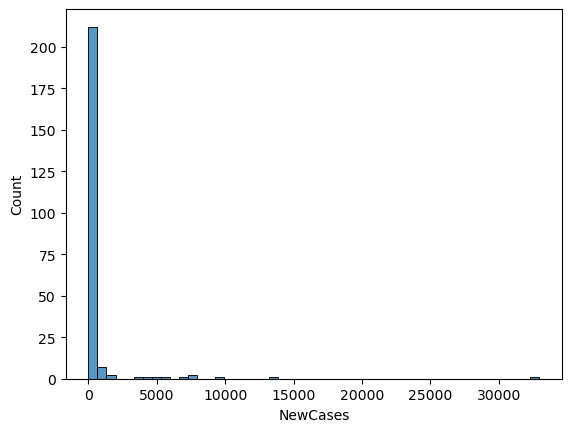

In [16]:
sns.histplot(data=countries_df, x="NewCases",bins=50)

**comment of NewCases**
- The chart show the distribution of new cases among countries
- At 27/2/2023, most countries have no new cases
=> ***This means that just a few countries have covid 19 at that moment.***

**TotalDeaths**

In [17]:
df = countries_df.loc[countries_df['TotalDeaths'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
229,222.0,Tuvalu,2805,0.0,NaN,NaN,NaN,NaN,2805.0,NaN,...,NaN,12066.0,Australia/Oceania,4.0,NaN,NaN,NaN,NaN,232471.0,2023-02-27
230,223.0,Saint Helena,2166,0.0,NaN,NaN,2.0,NaN,2164.0,NaN,...,NaN,6115.0,Africa,3.0,NaN,NaN,NaN,NaN,353884.0,2023-02-27
231,224.0,Falkland Islands,1930,0.0,NaN,NaN,1930.0,NaN,0.0,NaN,...,2439107.0,3539.0,South America,2.0,NaN,0.0,NaN,NaN,NaN,2023-02-27
233,226.0,Niue,788,0.0,NaN,NaN,776.0,10.0,12.0,NaN,...,NaN,1622.0,Australia/Oceania,2.0,NaN,NaN,NaN,NaN,7398.0,2023-02-27
235,228.0,Vatican City,29,0.0,NaN,NaN,29.0,NaN,0.0,NaN,...,NaN,799.0,Europe,28.0,NaN,NaN,NaN,NaN,NaN,2023-02-27
238,231.0,Tokelau,5,0.0,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,1378.0,Australia/Oceania,276.0,NaN,NaN,NaN,NaN,3628.0,2023-02-27


In [18]:
df['Country,Other'].unique()

array(['Tuvalu', 'Saint Helena', 'Falkland Islands', 'Niue',
       'Vatican City', 'Tokelau'], dtype=object)

It seem that these regions do not report the `TotalDeaths`, that is because these are small islands or city. So for further analysis, we would drop these records.

In [19]:
countries_df = countries_df[countries_df['TotalDeaths'].isna()==False]

**NewDeaths**

In [20]:
countries_df['NewDeaths']=countries_df['NewDeaths'].fillna(0)

<AxesSubplot:xlabel='NewDeaths', ylabel='Count'>

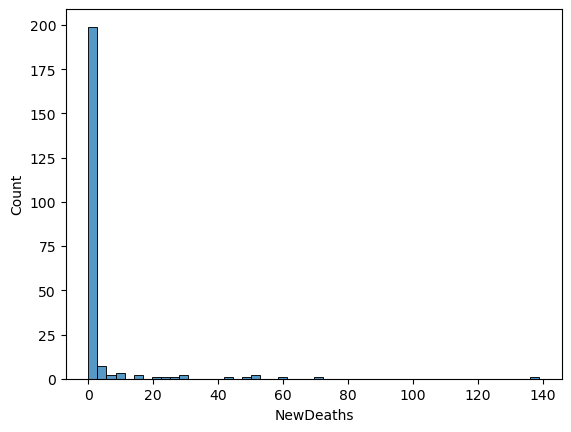

In [21]:
sns.histplot(data=countries_df, x="NewDeaths",bins=50)

**comment of NewDeaths**
- The chart show the distribution of new deaths among countries
- At 27/2/2023, most countries have no new deaths
- ***This means that covid 19 has become easier at this time.***

**TotalRecovered**

In [22]:
df = countries_df.loc[countries_df['TotalRecovered'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
19,12.0,Turkey,17042722,0.0,101492.0,0.0,NaN,NaN,NaN,NaN,...,1902052.0,85561976.0,Asia,5.0,843.0,1.0,NaN,NaN,1819.0,2023-02-27
74,67.0,Tunisia,1150793,0.0,29330.0,0.0,NaN,NaN,NaN,44.0,...,415169.0,12046656.0,Africa,10.0,411.0,2.0,NaN,NaN,951.0,2023-02-27
86,79.0,Paraguay,808327,0.0,19870.0,0.0,NaN,NaN,NaN,7.0,...,363751.0,7305843.0,South America,9.0,368.0,3.0,NaN,NaN,12338.0,2023-02-27
102,95.0,Honduras,472116,559.0,11111.0,2.0,NaN,NaN,NaN,105.0,...,159787.0,10221247.0,North America,22.0,920.0,6.0,550.0,0.2,32135.0,2023-02-27
119,112.0,Martinique,229807,0.0,1098.0,0.0,NaN,NaN,NaN,12.0,...,2215870.0,374087.0,North America,2.0,341.0,0.0,NaN,NaN,611101.0,2023-02-27
120,113.0,Laos,218015,0.0,758.0,0.0,NaN,NaN,NaN,NaN,...,164845.0,7481023.0,Asia,34.0,9869.0,6.0,NaN,NaN,28017.0,2023-02-27
122,115.0,Iceland,208999,0.0,229.0,0.0,NaN,NaN,NaN,2.0,...,5780036.0,345393.0,Europe,2.0,1508.0,0.0,NaN,NaN,385315.0,2023-02-27
124,117.0,Guadeloupe,201852,0.0,1010.0,0.0,NaN,NaN,NaN,19.0,...,2346306.0,399794.0,North America,2.0,396.0,0.0,NaN,NaN,496736.0,2023-02-27
144,137.0,Suriname,82227,0.0,1400.0,0.0,NaN,NaN,NaN,NaN,...,403644.0,596831.0,South America,7.0,426.0,2.0,NaN,NaN,52112.0,2023-02-27
146,139.0,French Polynesia,77957,0.0,649.0,0.0,NaN,NaN,NaN,7.0,...,NaN,284164.0,Australia/Oceania,4.0,438.0,NaN,NaN,NaN,154164.0,2023-02-27


We can fill these null value by this fomula: 

$$TotalRecovered=TotalCases-TotalDeaths-ActiveCases$$

However, these countries do not report ActiveCases too. Fortunately, we know `Active Cases/1M pop`, so we can find `ActiveCases` by this equation: 

$$ActiveCases=Active Cases/1M pop*Population/1000000$$

**ActiveCases**

In [23]:
countries_df.loc[countries_df['TotalRecovered'].isna(), 'ActiveCases']=round(df['Active Cases/1M pop']*df['Population']/1000000,1)
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,China,503302,0.0,5272.0,0.0,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-27
9,2.0,USA,105276823,6894.0,1145556.0,70.0,102654350.0,33706.0,1476917.0,2586.0,...,3485028.0,3.348053e+08,North America,3.0,292.0,0.0,210.0,0.2,4411.0,2023-02-27
10,3.0,India,44686371,169.0,530771.0,1.0,44153343.0,140.0,2257.0,NaN,...,653003.0,1.406632e+09,Asia,31.0,2650.0,2.0,1.0,NaN,2.0,2023-02-27
11,4.0,France,39616580,841.0,164929.0,52.0,39383240.0,4999.0,68411.0,869.0,...,4139547.0,6.558452e+07,Europe,2.0,398.0,0.0,130.0,0.8,1043.0,2023-02-27
12,5.0,Germany,38144033,32970.0,167951.0,139.0,37679400.0,17900.0,296682.0,NaN,...,1458359.0,8.388360e+07,Europe,2.0,499.0,1.0,3930.0,2.0,3537.0,2023-02-27


In [24]:
df = countries_df.loc[countries_df['TotalRecovered'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
19,12.0,Turkey,17042722,0.0,101492.0,0.0,NaN,NaN,155637.2,NaN,...,1902052.0,85561976.0,Asia,5.0,843.0,1.0,NaN,NaN,1819.0,2023-02-27
74,67.0,Tunisia,1150793,0.0,29330.0,0.0,NaN,NaN,11456.4,44.0,...,415169.0,12046656.0,Africa,10.0,411.0,2.0,NaN,NaN,951.0,2023-02-27
86,79.0,Paraguay,808327,0.0,19870.0,0.0,NaN,NaN,90139.5,7.0,...,363751.0,7305843.0,South America,9.0,368.0,3.0,NaN,NaN,12338.0,2023-02-27
102,95.0,Honduras,472116,559.0,11111.0,2.0,NaN,NaN,328459.8,105.0,...,159787.0,10221247.0,North America,22.0,920.0,6.0,550.0,0.2,32135.0,2023-02-27
119,112.0,Martinique,229807,0.0,1098.0,0.0,NaN,NaN,228604.9,12.0,...,2215870.0,374087.0,North America,2.0,341.0,0.0,NaN,NaN,611101.0,2023-02-27
120,113.0,Laos,218015,0.0,758.0,0.0,NaN,NaN,209595.8,NaN,...,164845.0,7481023.0,Asia,34.0,9869.0,6.0,NaN,NaN,28017.0,2023-02-27
122,115.0,Iceland,208999,0.0,229.0,0.0,NaN,NaN,133085.1,2.0,...,5780036.0,345393.0,Europe,2.0,1508.0,0.0,NaN,NaN,385315.0,2023-02-27
124,117.0,Guadeloupe,201852,0.0,1010.0,0.0,NaN,NaN,198592.1,19.0,...,2346306.0,399794.0,North America,2.0,396.0,0.0,NaN,NaN,496736.0,2023-02-27
144,137.0,Suriname,82227,0.0,1400.0,0.0,NaN,NaN,31102.1,NaN,...,403644.0,596831.0,South America,7.0,426.0,2.0,NaN,NaN,52112.0,2023-02-27
146,139.0,French Polynesia,77957,0.0,649.0,0.0,NaN,NaN,43807.9,7.0,...,NaN,284164.0,Australia/Oceania,4.0,438.0,NaN,NaN,NaN,154164.0,2023-02-27


In [25]:
countries_df.loc[countries_df['TotalRecovered'].isna(), 'TotalRecovered']=df['TotalCases']-df['TotalDeaths']-df['ActiveCases']

<AxesSubplot:xlabel='ActiveCases', ylabel='Count'>

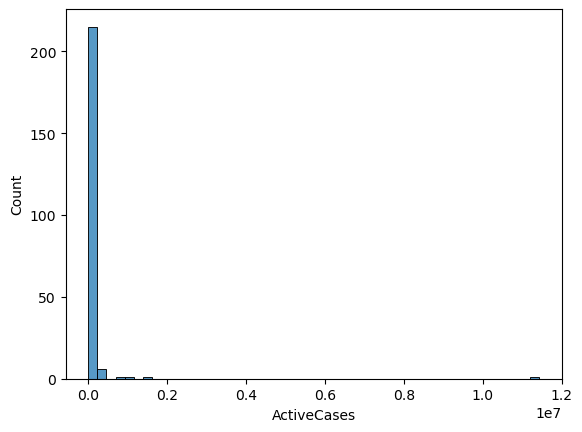

In [26]:
sns.histplot(data=countries_df, x="ActiveCases",bins=50)

**comment of ActiveCases**
- The chart show the distribution of active cases among countries
- Because of low risks the number of zero active cases is popular among countries.

**NewRecovered**

In [27]:
countries_df['NewRecovered']=countries_df['NewRecovered'].fillna(0)

<AxesSubplot:xlabel='NewRecovered', ylabel='Count'>

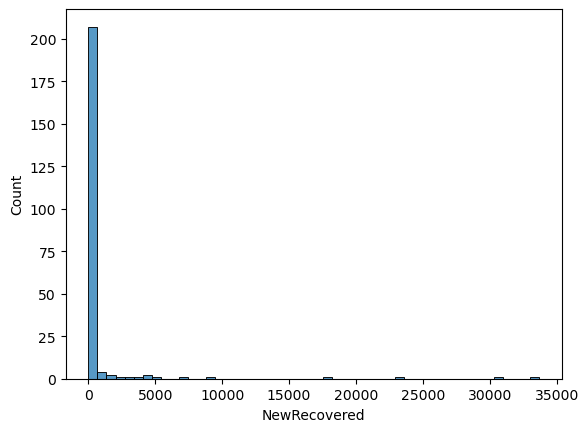

In [28]:
sns.histplot(data=countries_df, x="NewRecovered",bins=50)

**comment of NewRecovered**
- The chart show the distribution of new recovered among countries
- At 27/2/2023, most countries have no new recovered
- ***This means that just a few countries have covid 19 at that moment.***


**Serious,Critical**

In [29]:
countries_df['Serious,Critical']=countries_df['Serious,Critical'].fillna(0)

<AxesSubplot:xlabel='Serious,Critical', ylabel='Count'>

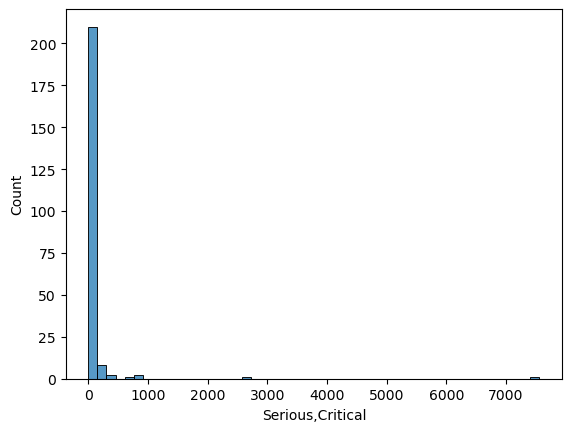

In [30]:
sns.histplot(data=countries_df, x="Serious,Critical",bins=50)

**comment of Serious,Critical**
- The chart show the distribution of serious, critical among countries
- At 27/2/2023, most countries have no serious, critical
- ***This means that just a few countries have covid 19 at that moment.***


**TotalTests**

In [31]:
df = countries_df.loc[countries_df['TotalTests'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
38,31.0,DPRK,4772813,0.0,74.0,0.0,4772739.0,0.0,0.0,0.0,...,NaN,25990679.0,Asia,5.0,351225.0,NaN,NaN,NaN,NaN,2023-02-27
146,139.0,French Polynesia,77957,0.0,649.0,0.0,33500.1,0.0,43807.9,7.0,...,NaN,284164.0,Australia/Oceania,4.0,438.0,NaN,NaN,NaN,154164.0,2023-02-27
158,151.0,Seychelles,50665,0.0,172.0,0.0,50440.0,0.0,53.0,0.0,...,NaN,99426.0,Africa,2.0,578.0,NaN,NaN,NaN,533.0,2023-02-27
164,157.0,Tanzania,42823,0.0,846.0,0.0,200.0,0.0,41777.0,7.0,...,NaN,63298550.0,Africa,1478.0,74821.0,NaN,NaN,NaN,660.0,2023-02-27
180,173.0,Solomon Islands,24575,0.0,153.0,0.0,16357.3,0.0,8064.7,1.0,...,NaN,721159.0,Australia/Oceania,29.0,4713.0,NaN,NaN,NaN,11183.0,2023-02-27
189,182.0,Nicaragua,18491,0.0,225.0,0.0,4225.0,0.0,14041.0,0.0,...,NaN,6779100.0,North America,367.0,30129.0,NaN,NaN,NaN,2071.0,2023-02-27
191,184.0,Tajikistan,17786,0.0,125.0,0.0,17264.0,0.0,397.0,0.0,...,NaN,9957464.0,Asia,560.0,79660.0,NaN,NaN,NaN,40.0,2023-02-27
198,191.0,Marshall Islands,15598,0.0,17.0,0.0,15528.0,0.0,53.0,0.0,...,NaN,60057.0,Australia/Oceania,4.0,3533.0,NaN,NaN,NaN,882.0,2023-02-27
211,204.0,Comoros,8998,0.0,161.0,0.0,8837.0,0.0,0.0,0.0,...,NaN,907419.0,Africa,101.0,5636.0,NaN,NaN,NaN,NaN,2023-02-27
224,217.0,Kiribati,5013,0.0,18.0,0.0,2703.0,0.0,2292.0,3.0,...,NaN,123419.0,Australia/Oceania,25.0,6857.0,NaN,NaN,NaN,18571.0,2023-02-27


It is easy to recognize that all of countries are isolated due to polital conditions, war, poverty or isolation. For instance, `Diamond Princess` and `MS Zaandam` are luxury cruise ships, which had experienced a big virus transmission at the early stage of the Covid-19 pandemic. For further analysis, we would drop these records.

In [32]:
countries_df = countries_df[countries_df['TotalTests'].isna()==False]

**Population**

<AxesSubplot:xlabel='Population', ylabel='Count'>

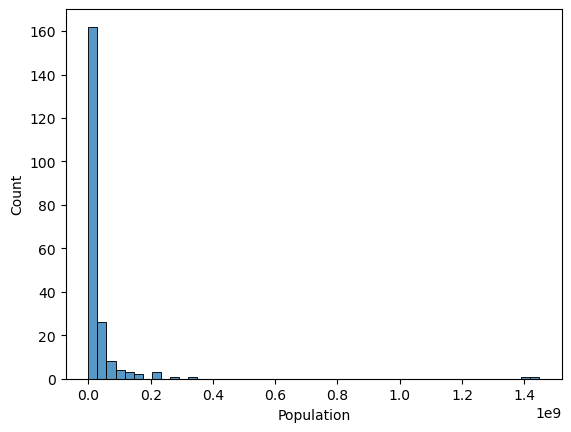

In [33]:
sns.histplot(data=countries_df, x="Population",bins=50)

**comment of Population**
- The chart show the distribution of population among countries

**New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop**

In [34]:
columns = ['New Cases/1M pop','New Deaths/1M pop','Active Cases/1M pop']

In [35]:
countries_df[columns]=countries_df[columns].fillna(0)

<AxesSubplot:xlabel='New Cases/1M pop', ylabel='Count'>

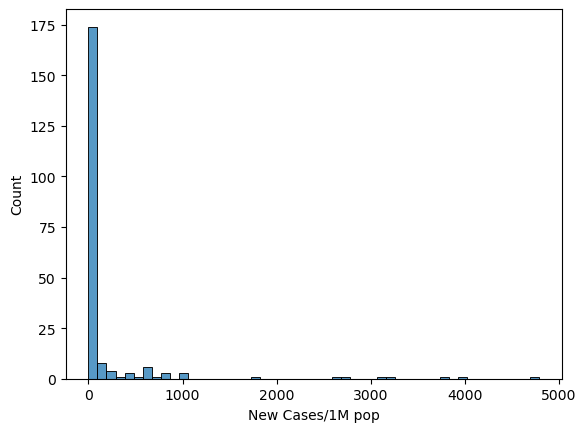

In [36]:
sns.histplot(data=countries_df, x="New Cases/1M pop",bins=50)

**comment of New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop**
-  The chart show the distribution of new cases/1M pop, new deaths/1M pop, active cases/1M pop among countries
- At 27/2/2023, most countries have no new cases/1M pop, new deaths/1M pop, active cases/1M pop
- ***This means that just a few countries have covid 19 at that moment.***


<AxesSubplot:xlabel='New Deaths/1M pop', ylabel='Count'>

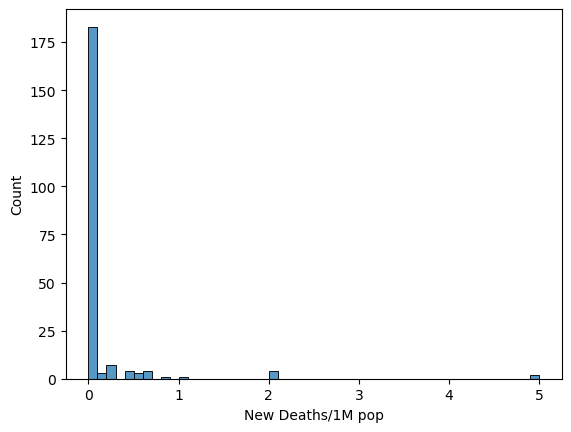

In [37]:
sns.histplot(data=countries_df, x="New Deaths/1M pop",bins=50)

**1 Caseevery X ppl, 1 Deathevery X ppl, 1 Testevery X ppl**
- The chart show the distribution of 1 case every X ppl, 1 death every X ppl, 1 test every X ppl in the world. The most 1 case every X ppl, 1 death every X ppl, 1 test every X ppl are in the range of 0-1000

<AxesSubplot:xlabel='Active Cases/1M pop', ylabel='Count'>

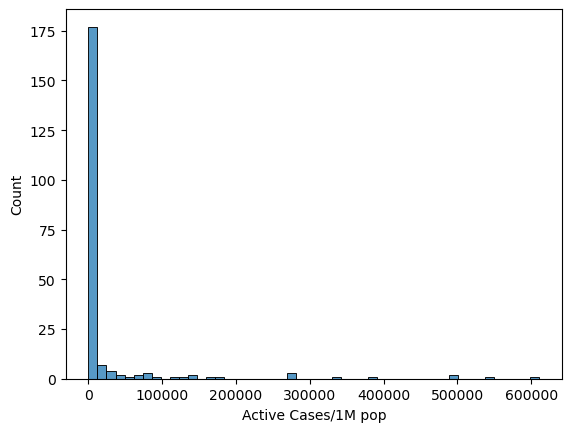

In [38]:
sns.histplot(data=countries_df, x="Active Cases/1M pop",bins=50)

It is awesome that there are no missing value now.

In [39]:
df = countries_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(countries_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,212.0,1.090896e+02,6.385311e+01,1.0,54.75,107.5,163.25,2.250000e+02,0.0
TotalCases,212.0,3.183122e+06,9.940184e+06,1403.0,36815.75,269016.5,1466371.50,1.052768e+08,0.0
NewCases,212.0,5.295896e+02,2.735008e+03,0.0,0.00,0.0,26.00,3.297000e+04,0.0
TotalDeaths,212.0,3.206255e+04,1.090582e+05,1.0,294.75,2869.0,16863.75,1.145556e+06,0.0
NewDeaths,212.0,3.325472e+00,1.366466e+01,0.0,0.00,0.0,0.00,1.390000e+02,0.0
TotalRecovered,212.0,3.055399e+06,9.616853e+06,104.1,25486.50,242543.5,1457077.25,1.026544e+08,0.0
NewRecovered,212.0,7.421132e+02,3.803914e+03,0.0,0.00,0.0,13.25,3.370600e+04,0.0
ActiveCases,212.0,9.566522e+04,7.960550e+05,0.0,83.75,1737.0,13676.50,1.143434e+07,0.0
"Serious,Critical",212.0,8.182075e+01,5.547821e+02,0.0,0.00,2.0,20.00,7.557000e+03,0.0
Tot Cases/1M pop,212.0,1.972533e+05,1.970801e+05,347.0,18548.75,128888.5,317935.50,7.039590e+05,0.0


**Values distribution of Catergorial columns**

In [40]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,"Country,Other",Continent,Date
missing_percentage,0.0,0.0,0.0
num_values,212,6,1
value_percentages,"{'Mauritius': 0.5, 'Malta': 0.5, 'Suriname': 0.5, 'Niger': 0.5, 'Bahamas': 0.5, 'Denmark': 0.5, ...","{'Africa': 25.0, 'Asia': 22.6, 'Europe': 22.2, 'North America': 17.9, 'Australia/Oceania': 6.1, ...",{2023-02-27: 100.0}


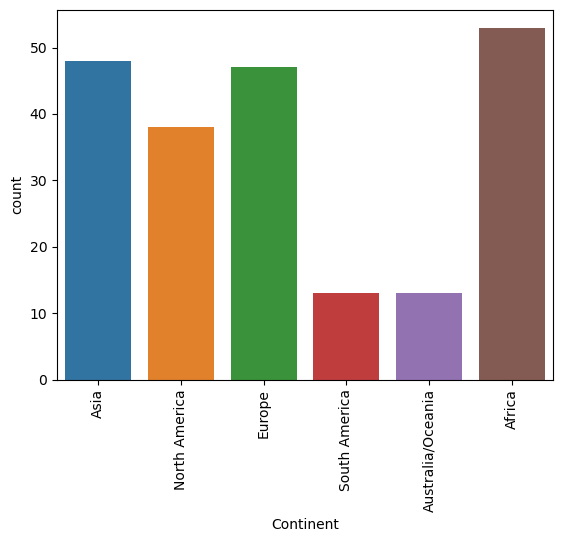

In [41]:
plt.xticks(rotation=90)
sns.countplot(x=countries_df['Continent'])
plt.show()

**conclusion of values distribution of Catergorial columns in countries**
- The chart show the number of countries in each continent
- The most countries are in Africa, so we can guess that the patients in Africa are the most.


# Continents

In [42]:
continents_df = big_df[(big_df['#'].isna())&((big_df['Country,Other']!='Total:')\
                                             &(big_df['Country,Other']!='\n\n'))&(big_df['Continent']!='All')]
continents_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\nAsia\n,214275435,21169.0,1536461.0,157.0,198909142.0,28708.0,13829832.0,15497.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-27
1,NaN,\nNorth America\n,124580169,16947.0,1611268.0,149.0,119787772.0,43175.0,3181129.0,7750.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-27
2,NaN,\nEurope\n,246227059,55613.0,2016755.0,297.0,241811330.0,45101.0,2398974.0,6459.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-27
3,NaN,\nSouth America\n,67991811,15796.0,1350520.0,92.0,66251241.0,38668.0,390050.0,10186.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-27
4,NaN,\nOceania\n,13996291,1297.0,26116.0,6.0,13834558.0,1186.0,135617.0,64.0,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-27


**Values distribution of Numeric columns**

In [43]:
df = continents_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(continents_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
TotalCases,6.0,1.133107e+08,1.000085e+08,12793643.0,27495171.00,96285990.0,1.918516e+08,246227059.0,0.0
NewCases,6.0,1.871217e+04,1.990258e+04,1297.0,5037.25,16371.5,2.011350e+04,55613.0,0.0
TotalDeaths,6.0,1.133284e+06,8.012065e+05,26116.0,531565.75,1443490.5,1.592566e+06,2016755.0,0.0
NewDeaths,6.0,1.175000e+02,1.102157e+02,4.0,27.50,120.5,1.550000e+02,297.0,0.0
TotalRecovered,6.0,1.087782e+08,9.603848e+07,12075067.0,26938728.75,93019506.5,1.791288e+08,241811330.0,0.0
NewRecovered,6.0,2.622017e+04,2.046559e+04,483.0,8066.50,33688.0,4.204825e+04,45101.0,0.0
ActiveCases,6.0,3.399266e+06,5.257204e+06,135617.0,407536.25,1429484.5,2.985590e+06,13829832.0,0.0
"Serious,Critical",6.0,6.750500e+03,5.875042e+03,64.0,2025.00,7104.5,9.577000e+03,15497.0,0.0
Tot Cases/1M pop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


**Drop unrelevant or null columns**

In [44]:
cols = ['#','Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests','Country,Other',\
       'Tests/\n1M pop\n', 'Population', '1 Caseevery X ppl','1 Testevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop','New Deaths/1M pop','Date']
# drop unrelevant columns
continents_df =continents_df.drop(columns=cols,axis=1)
continents_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Continent
0,214275435,21169.0,1536461.0,157.0,198909142.0,28708.0,13829832.0,15497.0,Asia
1,124580169,16947.0,1611268.0,149.0,119787772.0,43175.0,3181129.0,7750.0,North America
2,246227059,55613.0,2016755.0,297.0,241811330.0,45101.0,2398974.0,6459.0,Europe
3,67991811,15796.0,1350520.0,92.0,66251241.0,38668.0,390050.0,10186.0,South America
4,13996291,1297.0,26116.0,6.0,13834558.0,1186.0,135617.0,64.0,Australia/Oceania
5,12793643,1451.0,258581.0,4.0,12075067.0,483.0,459995.0,547.0,Africa


**TotalTests**

In [45]:
df=countries_df.groupby(['Continent']).TotalTests.sum().reset_index()
continents_df = continents_df.merge(df,on='Continent',how='left')

**Population**

In [46]:
df=countries_df.groupby(['Continent']).Population.sum().reset_index()
continents_df = continents_df.merge(df,on='Continent',how='left')

**Values distribution of Catergorial columns**

In [47]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = continents_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(continents_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Continent
missing_percentage,0.0
num_values,6
value_percentages,"{'Asia': 16.7, 'South America': 16.7, 'Europe': 16.7, 'Africa': 16.7, 'Australia/Oceania': 16.7,..."


<a class="anchor" id="3.1"></a>
# Question 1: <center>Which attributes contribute to the newcases among countries?</center> 
**Introduction:**
The background (academics environment and current situation) can influence either positively or negatively a person’s mental well-being. These factors can be current year of study, marial status, age, ...  In this project, we would like to study the relationship between students' background and their mental health issues. Finding this connection would help schools give useful advices for students as well as prepare mental health support for students.

**Step summary:**
1. [Year analysis](#3.1.1)
2. [CGPA analysis](#3.1.2)
3. [Age analysis](#3.1.3)
4. [Major analysis](#3.1.4)
5. [Marital Status Analysis](#3.1.5)
6. [Modeling](#3.1.6)
7. [Conclusion](#3.1.7)

<a class="anchor" id="3.2"></a>
# Question 2. <center>What is the different picture of covid pandemic between continents?</center> 

**Introduction**
As we think, a student would find the support from specialists when they have any symtoms of `anxiety`,`depression`,`panic attack`. However, this fact raise the question that whether they would have as we think in the real world? Therefore, we would find the answer for this question and from this, we can give useful advices for students to care more about their mental health.

**Step summary:**
1. **General situation analysis ('TotalCases','TotalRecovered','TotalTests','TotalDeaths')**
2. **Background analysis (Population)**
3. **Current situation analysis ('NewCases','NewDeaths','NewRecovered','Serious,Critical')**
4. **Activecase analysis**
4. **Conclusion**

Let's warm up with a simple question

### General picture analysis

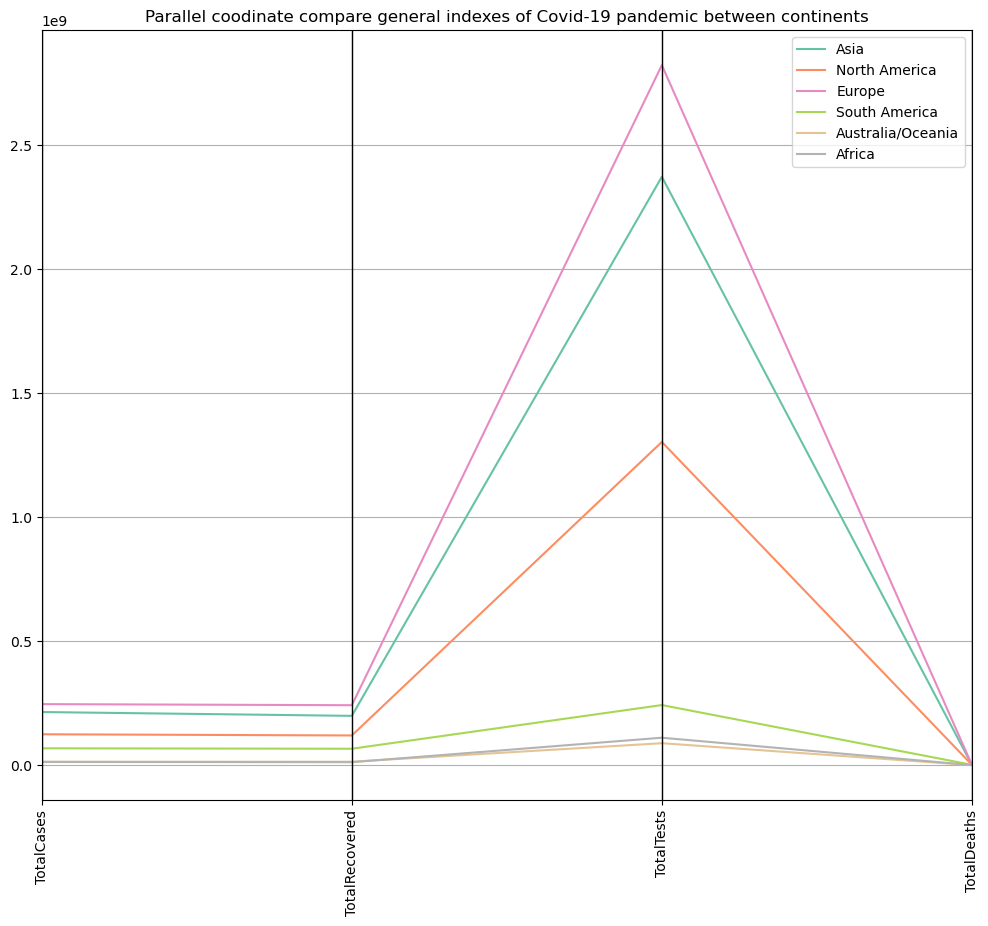

In [48]:
df = continents_df[['Continent','TotalCases','TotalRecovered','TotalTests','TotalDeaths']]

plt.figure(figsize=(12, 10))
parallel_coordinates(df,'Continent', colormap=plt.get_cmap("Set2"))
plt.title('Parallel coodinate compare general indexes of Covid-19 pandemic between continents')
plt.xticks(rotation=90)
plt.show()

**Comment**

- It is easy to see that Europe have the highest value in all figures, whereas the second place is the Asia. It seems that Europe and Asia have experienced more serious situation than others. 
- What stands out from the diagram is that the total deaths was significantly smaller than the total cases, while the number of residents who have tested was considerably larger than that of being infected. The total recovered was approximately equal to the total cases.

**TotalCases**

Now, let's see if we change our view of TotalCases.

In [49]:
df = countries_df.groupby('Continent').TotalCases.sum()
df

Continent
Africa                12688981
Asia                 209484836
Australia/Oceania     13869550
Europe               246227030
North America        124561678
South America         67989881
Name: TotalCases, dtype: int64

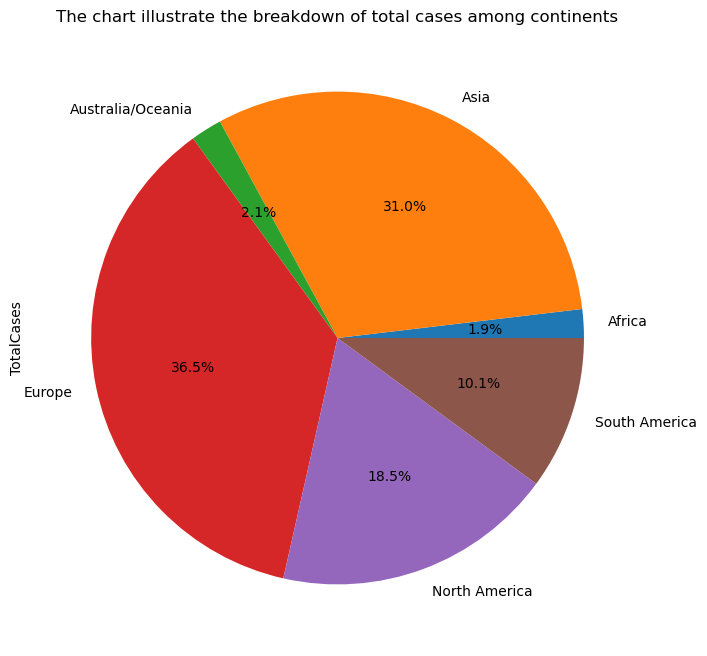

In [50]:
plt.figure(figsize=(10, 8))
plt.title('The chart illustrate the breakdown of total cases among continents')
df.plot.pie(autopct="%.1f%%");

**comment of TotalCases**

- Most of Covid cases are in Europe, which made up for over a third of totalcases worldwide, while the Asia just take over 31.0%.
- Africa had the smallest proportion, just 1.9%, compared to 2.1% of Australia/Oceania.

**Population analysis**

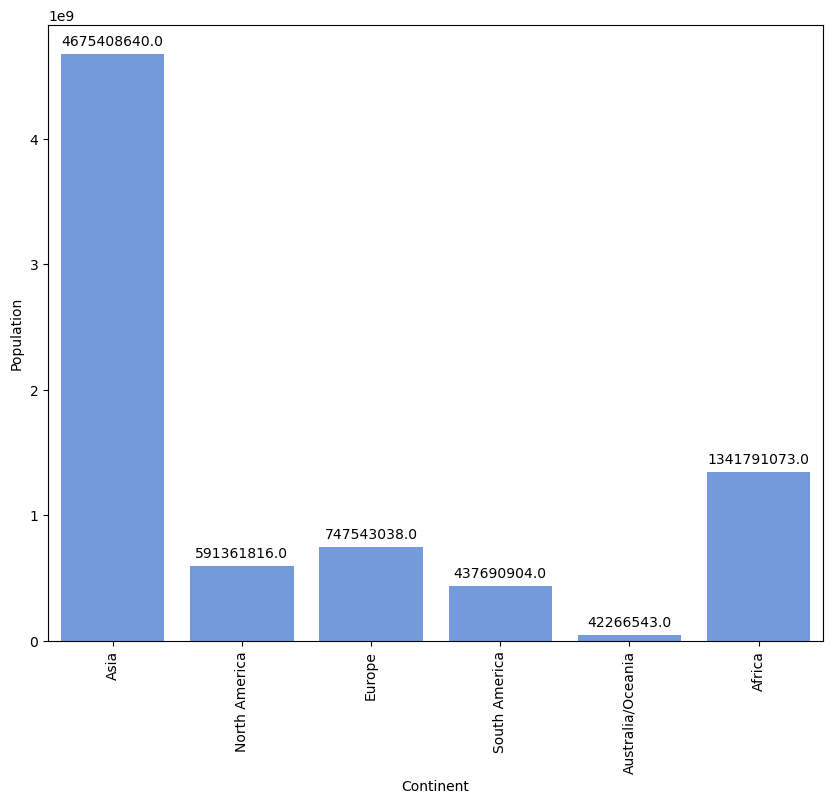

In [51]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='Population', data=continents_df,color = '#6495ED')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

**comment of population**
- Although Europe made up the largest proportion of Covid-19 cases, at 36%, all of us know that the most densely populated continent is Asia. This means that Europe underwent more severe pandemic than Asia. So now the question is **whether Europe was the continents having the highest covid-19 infection rate?**

In [52]:
continents_df['TotalCases/Population']=continents_df['TotalCases']/continents_df['Population']*100
continents_df['TotalCases/Population']

0     4.583031
1    21.066658
2    32.938178
3    15.534207
4    33.114350
5     0.953475
Name: TotalCases/Population, dtype: float64

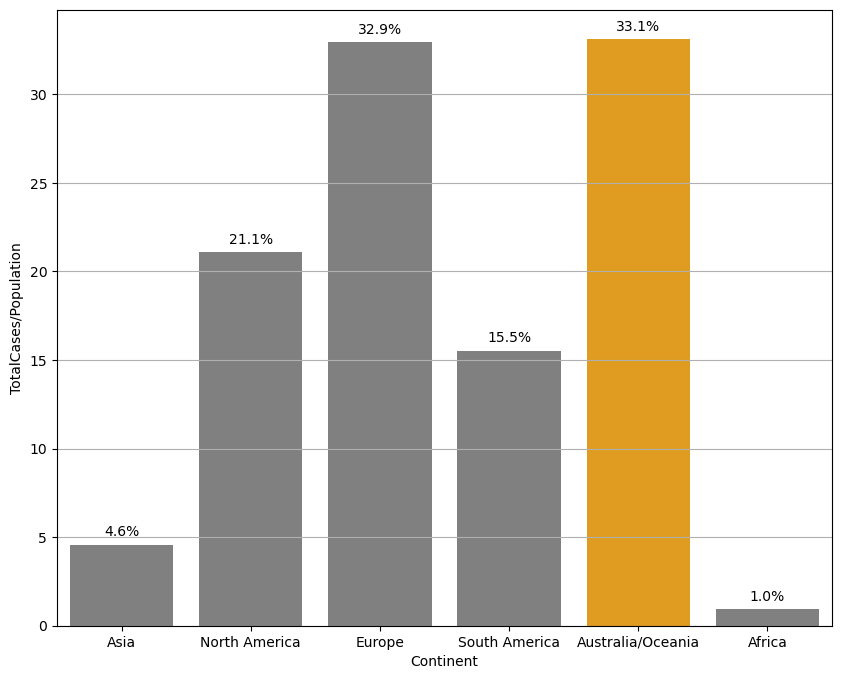

In [53]:
# bar chart
plt.figure(figsize=(10, 8))
plt.grid()
cols = ['grey' if (x != max(continents_df['TotalCases/Population'])) else 'orange' \
        for x in continents_df['TotalCases/Population']]
splot=sns.barplot(x="Continent", y='TotalCases/Population', data=continents_df,
                 palette=cols)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f')+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

- It is surprising that not Europe, Australia was the continent having the highest value of TotalCases/Population, although it has the lightest population in the world. The Covid-19 infection rate in Europe was just slightly smaller than Australia, 32.9% compare to 33.11%.
- Despite of the highest population, the infection rate of Asia is smaller than all other continents, except Africa.

**Deadth rate analysis**

Another aspect we need to consider is the deadth rates of continents. Now, let's validate again that Europe had the highest number of deaths in the world. 

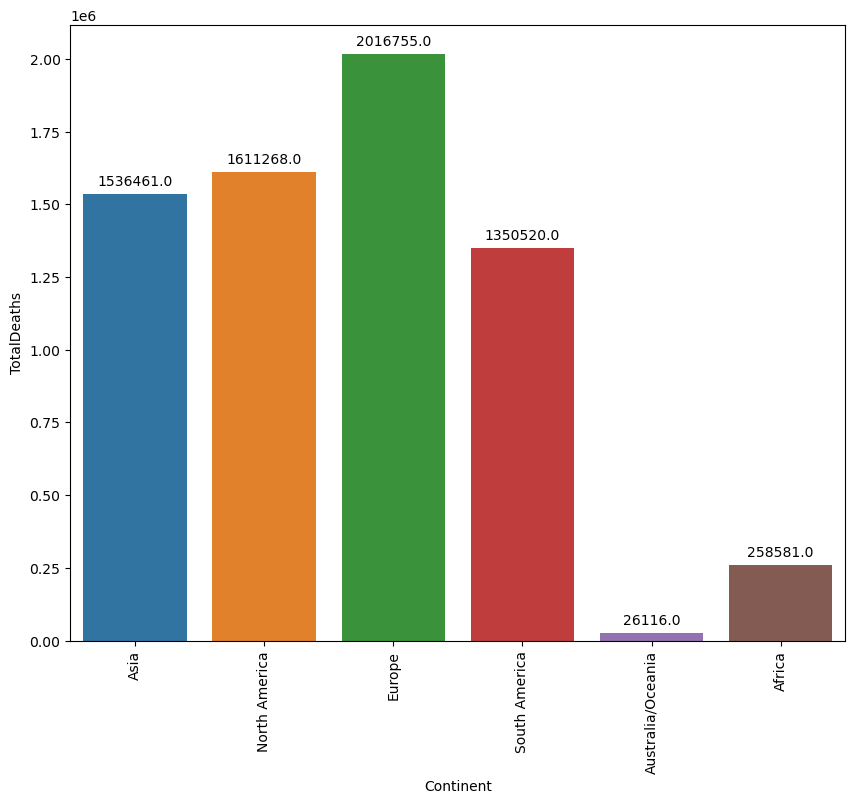

In [54]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='TotalDeaths', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


So now, **which continents have the highest deadth rate? Is that Europe?**

In [55]:
continents_df['TotalDeaths/TotalCases']=continents_df['TotalDeaths']/continents_df['TotalCases']*100
continents_df['TotalDeaths/TotalCases']

0    0.717050
1    1.293358
2    0.819063
3    1.986298
4    0.186592
5    2.021168
Name: TotalDeaths/TotalCases, dtype: float64

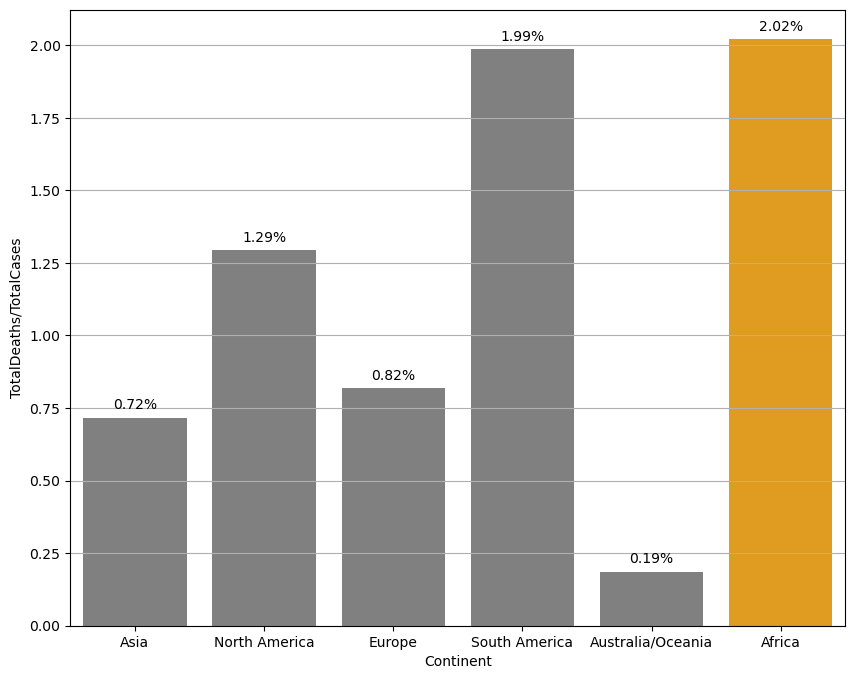

In [56]:
# bar chart
plt.figure(figsize=(10, 8))
plt.grid()
cols = ['grey' if (x != max(continents_df['TotalDeaths/TotalCases'])) else 'orange' \
        for x in continents_df['TotalDeaths/TotalCases']]
splot=sns.barplot(x="Continent", y='TotalDeaths/TotalCases', data=continents_df,
                 palette=cols)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f')+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

**Comment**
- It is interesting that although Europe seems having the worst situation, its deadth rate was just over a third of Africa, which was the highest deadth rate. South America was modestly smaller, 1.99% compared to 2.02%.
- Inspite of having the highest infection rate, Australia had the smallest deadth rate in our planet.

**Recovered rate analysis**

In [57]:
df = countries_df.groupby('Continent').TotalRecovered.sum()
df

Continent
Africa                12015597.6
Asia                 194119131.0
Australia/Oceania     13765694.0
Europe               241811300.9
North America        119783547.2
South America         66249311.4
Name: TotalRecovered, dtype: float64

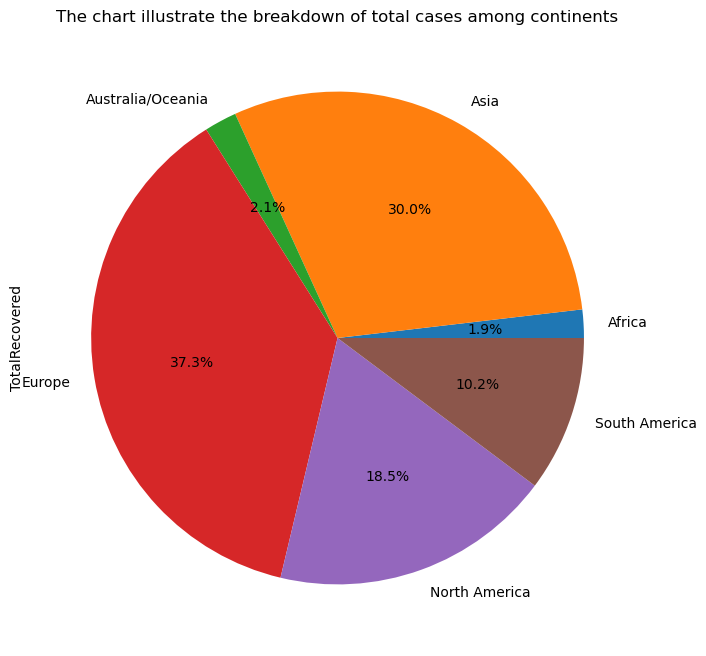

In [58]:
plt.figure(figsize=(10, 8))
plt.title('The chart illustrate the breakdown of total cases among continents')
df.plot.pie(autopct="%.1f%%");

From the pie chart, Europe was continually the continent which accounted for the largest breakdown of recovered patients, and Asia standed at the second place.

In [59]:
continents_df['TotalRecovered/TotalCases']=continents_df['TotalRecovered']/continents_df['TotalCases']*100
continents_df['TotalRecovered/TotalCases']

0    92.828719
1    96.153162
2    98.206643
3    97.440030
4    98.844458
5    94.383336
Name: TotalRecovered/TotalCases, dtype: float64

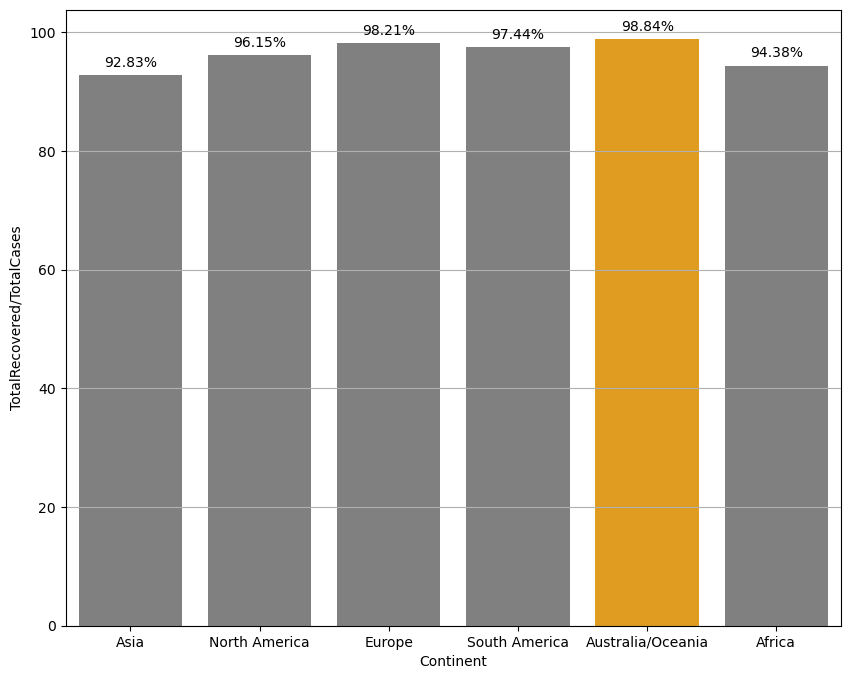

In [60]:
# bar chart
plt.figure(figsize=(10, 8))
plt.grid()
cols = ['grey' if (x != max(continents_df['TotalRecovered/TotalCases'])) else 'orange' \
        for x in continents_df['TotalRecovered/TotalCases']]
splot=sns.barplot(x="Continent", y='TotalRecovered/TotalCases', data=continents_df,
                 palette=cols)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f')+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

- Although death rate and infection rate was better than most other continents, its recovered rate was not so impressive, just 92.83%. While Australia was the best again, at 98.84%, compare to 98.21% of Europe.

**TotalTests**

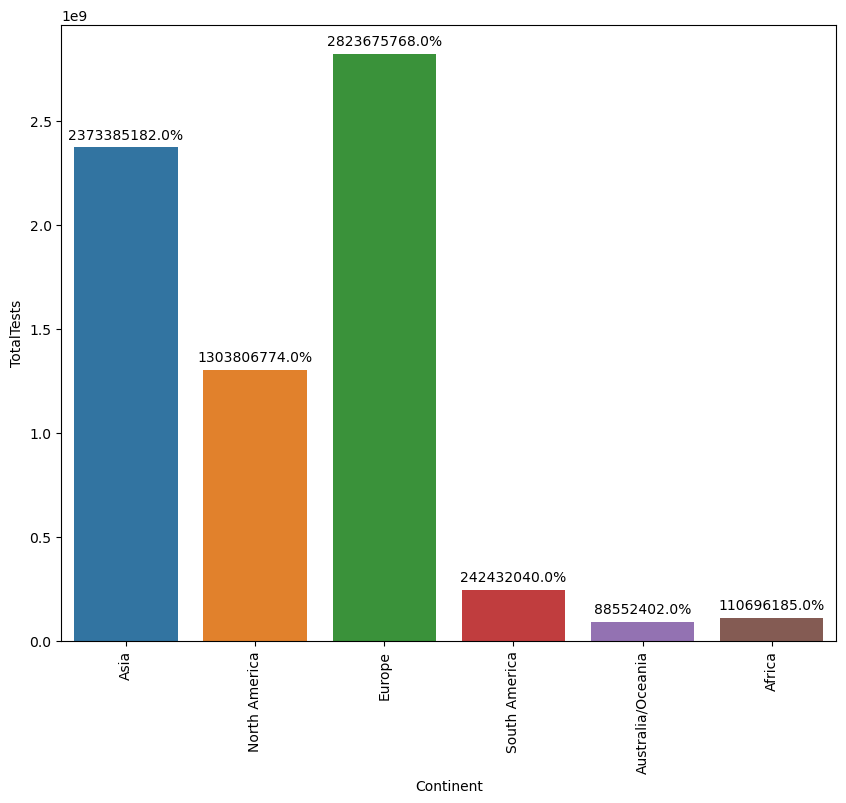

In [61]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='TotalTests', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f')+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**Comment**
- Overall, the total tests still remain the indentical rank to other indexes. **Does this make we believe that Europe is the best in finding covid cases?**

In [62]:
continents_df['TotalCases/TotalTests']=continents_df['TotalCases']/continents_df['TotalTests']*100
continents_df['TotalCases/TotalTests']

0     9.028262
1     9.555110
2     8.720090
3    28.045720
4    15.805659
5    11.557438
Name: TotalCases/TotalTests, dtype: float64

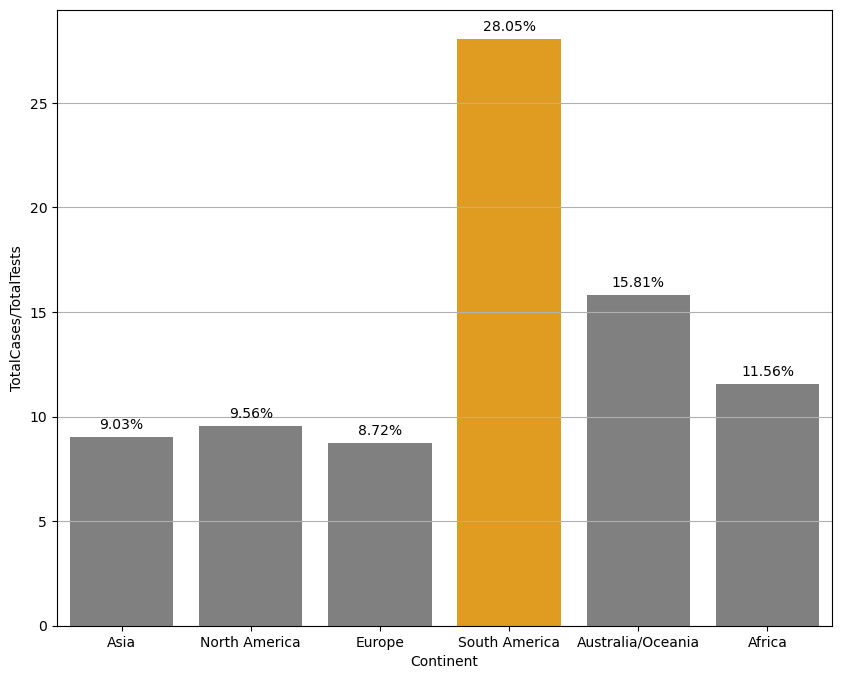

In [63]:
# bar chart
plt.figure(figsize=(10, 8))
plt.grid()
cols = ['grey' if (x != max(continents_df['TotalCases/TotalTests'])) else 'orange' \
        for x in continents_df['TotalCases/TotalTests']]
splot=sns.barplot(x="Continent", y='TotalCases/TotalTests', data=continents_df,
                 palette=cols)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f')+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

- It is interesting that the continent having the foremost detection rate was South America at 28.05%. Europe had the smallest propotion, at just 8.72%, which may be the reason why this continent experienced the worst Covid-19 outbreak.

**Current situation analysis**

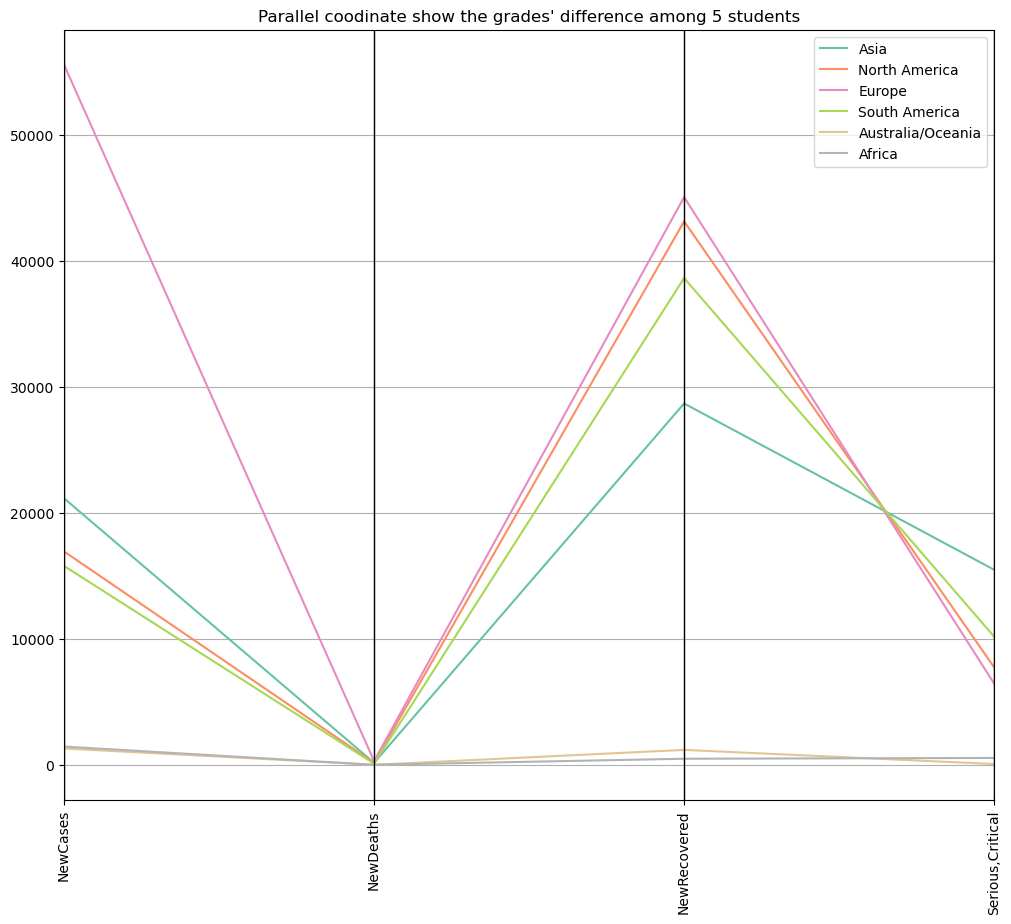

In [64]:
df = continents_df[['Continent','NewCases','NewDeaths','NewRecovered','Serious,Critical']]
plt.figure(figsize=(12, 10))
parallel_coordinates(df,'Continent', colormap=plt.get_cmap("Set2"))
plt.title('Parallel coodinate show the grades\' difference among 5 students')
plt.xticks(rotation=90)
plt.show()

**comment of New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop**
- The chart show the distribution of new cases/1M pop, new deaths/1M pop, active cases/1M pop in the world. The most new cases/1M pop, new deaths/1M pop, active cases/1M pop are in the range of 0-1000

**NewCases**

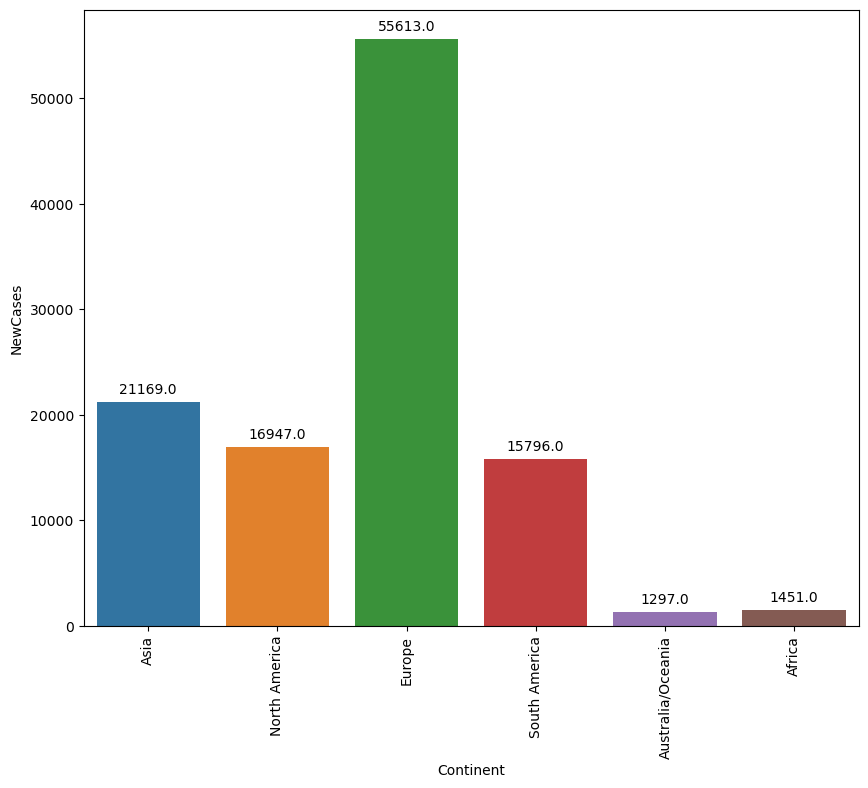

In [65]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='NewCases', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of NewCases**
- The chart show the distribution of new cases in the world. The most new cases are in the range of 0-10000

**NewDeaths**

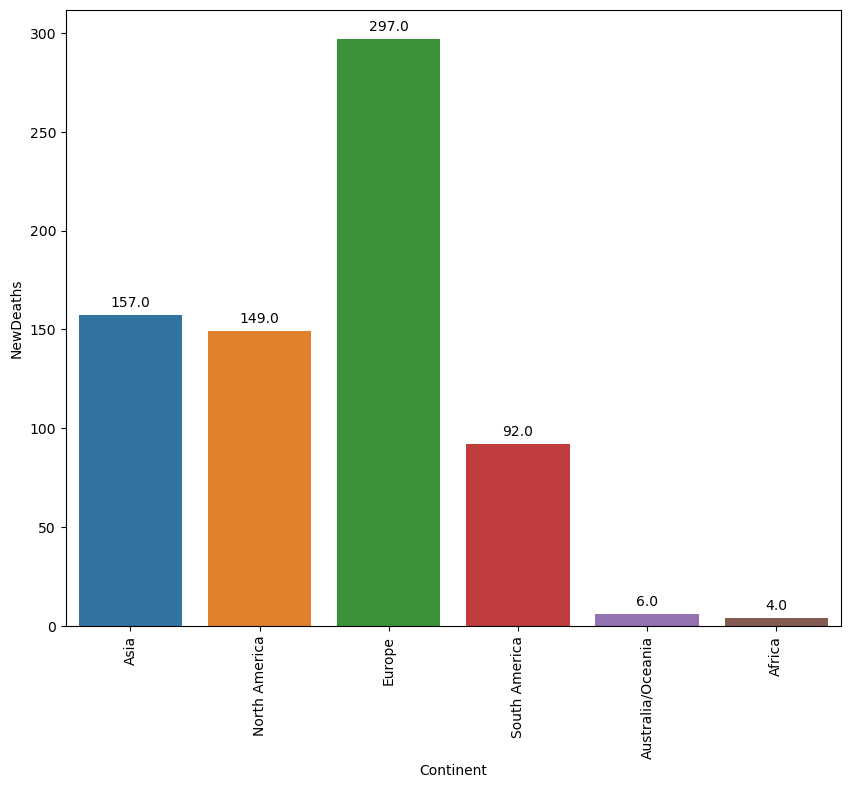

In [66]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='NewDeaths', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**NewRecovered**

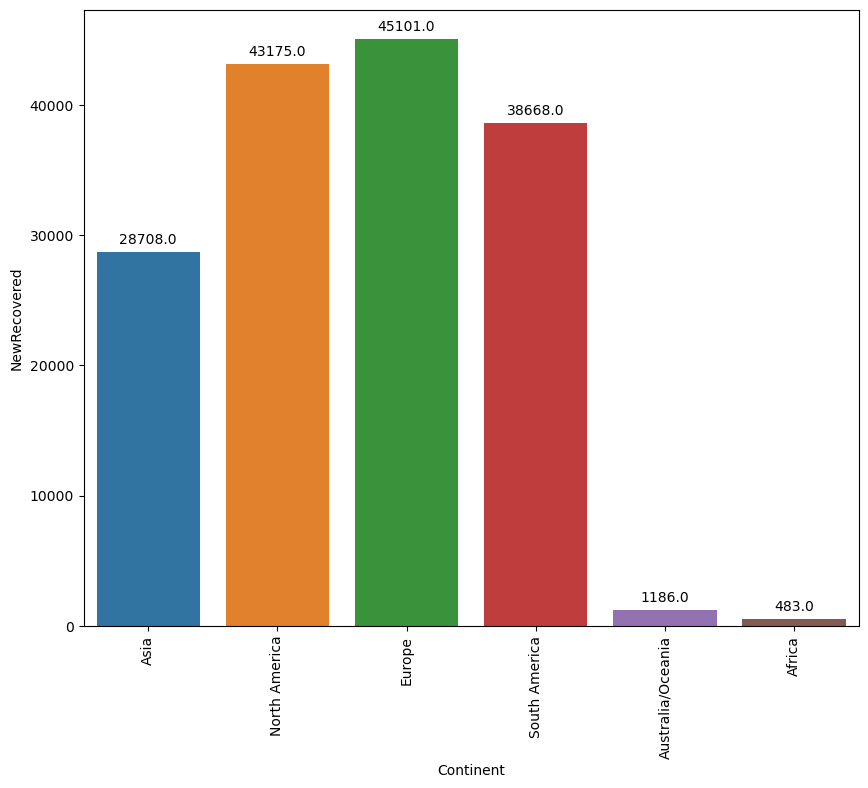

In [67]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='NewRecovered', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of NewRecovered**
- The chart show the distribution of new recovered in the world. The most new recovered are in the range of 0-1000
- In Europe, the new recovered are the most, which is 2.5 times of the second one.
- In North America, the new recovered are the second, which is 1.5 times of the third one.
- In South America, the new recovered are the third.

**Serious,Critical**

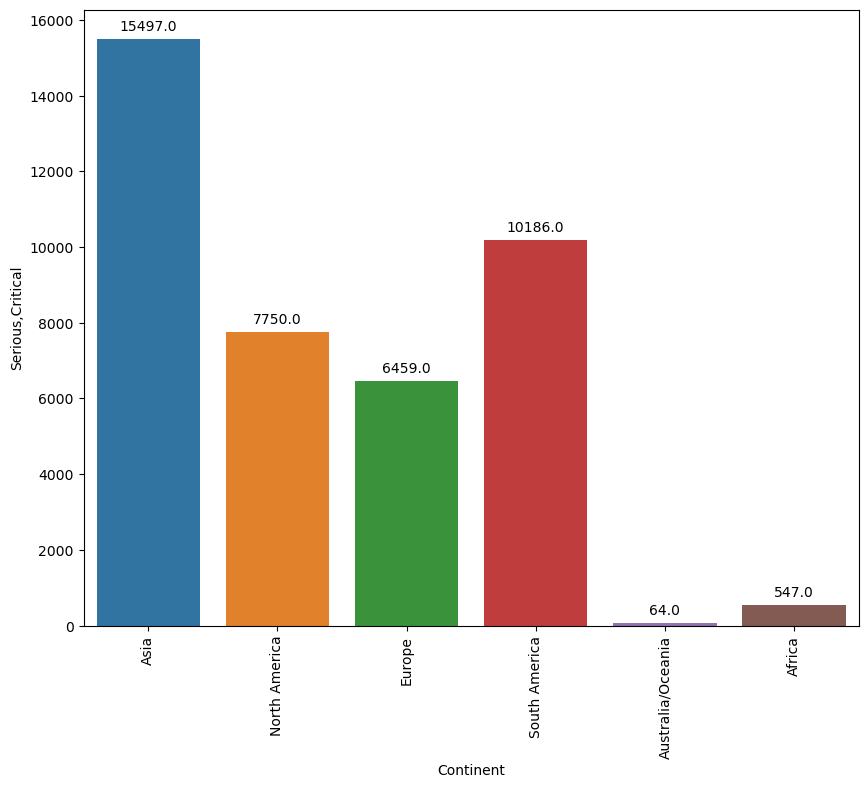

In [68]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='Serious,Critical', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**ActiveCases**

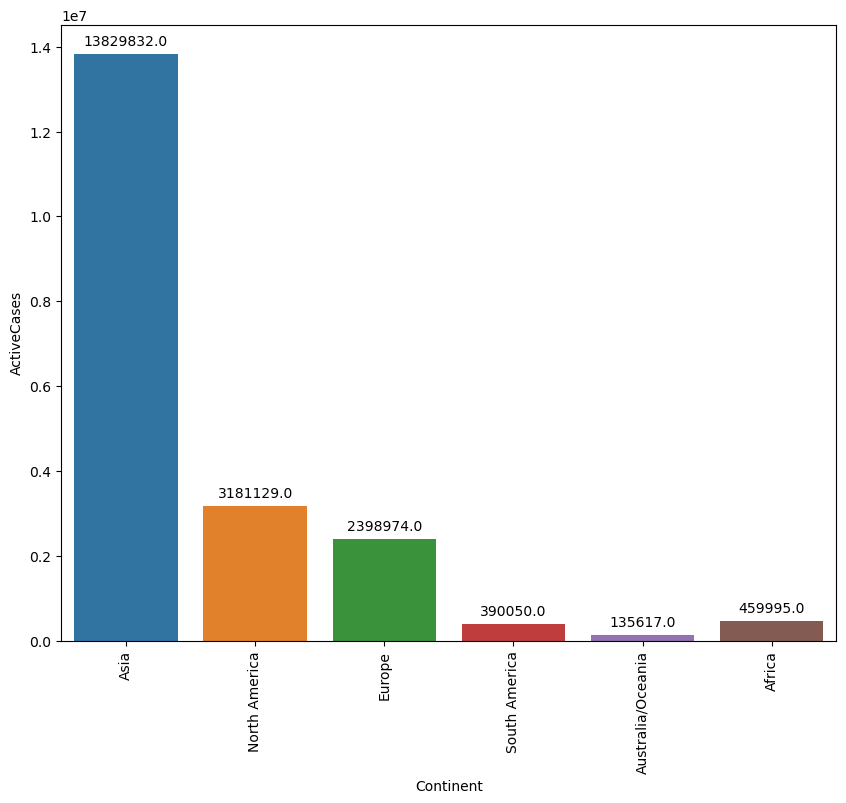

In [69]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='ActiveCases', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of ActiveCases**
- The chart show the distribution of active cases in the world. The most active cases are in the range of 0-1000000
- In Asia, the active cases are the most, which is many times of the second one.
- In North America, the active cases are the second, which is 1.5 times of the third one.
- In Europre, the active cases are the third.
